In [1]:
from Functions import get_processed_data
from sklearn.decomposition import PCA
from Functions import make_pca_agg_fit,add_pca_and_graph, prep_data_splits,size_clusters,anaylsis
import torch 
import os
from transfer_learning import MyDataset,NeuralNet_sherpa_optimize
import torch.nn as nn
import torch.optim as optim
from ignite.engine import Engine,Events
import time 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from Functions import Transfer_graphs,preformance_graph_and_prep_2nd_set,create_std_matrix,unpack_dic,create_dictionaries,make_distance_graph

In [2]:
import json
name="Toplology_6_run_resize"+".json"
with open(name, 'r') as f: 
  meta = json.load(f)
#needed from base file
epoch_conversions=[561, 561, 561, 561, 561, 561] #specify by orginal file
#Gc Clusters
#[431, 1208, 2727, 3812, 3455, 1873]
#resize
#topology
#[561, 561, 561, 561]
#GC
#[431, 431, 431, 431, 431, 431]

byte=268  #general number for 5 features
resolution=100
epochs=500 
#getting data files
processed=get_processed_data()
g_comp=6
var=.9
#this code should not matter
interest=["H2@100 bar/243K (wt%)"]
interest2 = ["H2@100 bar/243K (wt%)"]
#make PCA to run )
#Make PCA on data and generate 
pc1,pc2,color=make_pca_agg_fit(1,processed,var,g_comp,array_out=True,loud=False)
#get unprocessed data
data=get_processed_data(unprocessed=True)
pca_df=add_pca_and_graph(processed,pc1,pc2,color,graph=False)
#puts in old data needed, but can't be processed in PCA
pca_df[['MOF ID',interest[0],'topology']]=data[['MOF ID',interest[0],'topology']]

#removes some unneeded columns
abridge=pca_df[['MOF ID', 'void fraction', 'Vol. S.A.', 'Grav. S.A.','Pore diameter Limiting', 'Pore diameter Largest',interest[0],'topology', 'Pc1', 'Pc2', 'Cluster']]
#pca_df[['MOF ID',interest[0],interest2[0],'topology']]=data[['MOF ID',interest[0],interest2[0],'topology']]

#removes some unneeded columns
#abridge=pca_df[['MOF ID', 'void fraction', 'Vol. S.A.', 'Grav. S.A.','Pore diameter Limiting', 'Pore diameter Largest',interest[0],interest2[0],'topology', 'Pc1', 'Pc2', 'Cluster']]


['tpt' 'crs' 'sodb' 'csq' 'bor' 'ctn' 'the' 'stp' 'rhrb' 'ssa'] Cluster 0

['srsb' 'tbo' 'spn'] Cluster 1

['soc' 'pth' 'pyr' 'iac' 'nbob' 'she'] Cluster 2

['bcs' 'ith' 'bcu' 'bct' 'fcu'] Cluster 3

['gar' 'flu' 'rht' 'nia' 'ftw' 'lvtb' 'ocu' 'scu' 'reo' 'pcu' 'acs'] Cluster 4

['pts' 'ssb' 'lcsb' 'pto' 'diab' 'qtz'] Cluster 5

In [3]:
map={
    
"Cluster 0":['tpt', 'crs', 'sodb', 'csq', 'bor', 'ctn', 'the', 'stp', 'rhrb', 'ssa'],

"Cluster 1":['srsb' ,'tbo' ,'spn'] ,

"Cluster 2":['soc' ,'pth' ,'pyr' 'iac', 'nbob', 'she'] ,

"Cluster 3":['bcs', 'ith', 'bcu', 'bct', 'fcu'] ,

"Cluster 4":['gar', 'flu', 'rht', 'nia', 'ftw', 'lvtb', 'ocu', 'scu', 'reo', 'pcu', 'acs'],

"Cluster 5":['pts', 'ssb', 'lcsb', 'pto', 'diab', 'qtz'] ,
}
large={}
for i in map:
    for g in map[i]:
        large[g]=i
        print(len(i))
abridge.groupby("topology").median()

9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9


,MOF ID,void fraction,Vol. S.A.,Grav. S.A.,Pore diameter Limiting,Pore diameter Largest,H2@100 bar/243K (wt%),Pc1,Pc2,Cluster
topology,,,,,,,,,,
acs,24.0,-0.165696,1.230148,-0.397004,-0.717001,-0.981716,2.50,-1.744658,-0.849881,2.0
bcs,94.0,-1.316834,0.877719,-1.326480,-1.150626,-1.372476,1.60,-2.773369,-0.253861,1.0
bct,165.0,-1.070161,1.330536,-1.434958,-1.084639,-1.255248,1.40,-2.710366,-0.273143,1.0
bcu,259.0,-1.234610,1.155390,-1.443560,-1.188332,-1.309955,1.30,-2.953280,-0.102611,1.0
bor,566.5,0.656545,-0.952775,0.938192,0.532028,0.636032,8.60,1.667945,0.022014,4.0
crs,827.0,0.163200,-0.623841,-1.108089,0.649861,0.393761,3.10,0.345133,0.996102,3.0
csq,1156.0,0.245424,-0.049276,-0.343959,1.705644,0.956456,3.70,1.318080,0.729515,5.0
ctn,1698.0,0.656545,-0.792580,0.944405,0.244516,-0.036076,8.00,1.163522,-0.228294,4.0
diab,2145.5,0.492097,-0.200927,0.913342,-0.061850,-0.340869,6.30,0.541870,-0.663679,4.0


In [4]:
abridge["topology_1"]=abridge["topology"].map(large)

<ipython-input-4-32a10faafa38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abridge["topology_1"]=abridge["topology"].map(large)


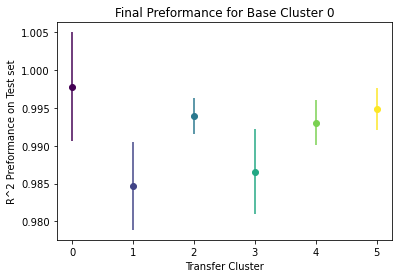

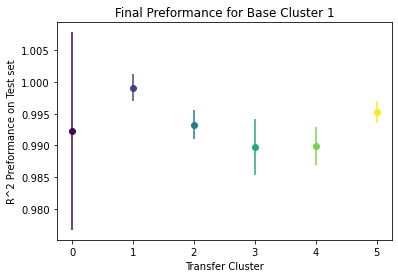

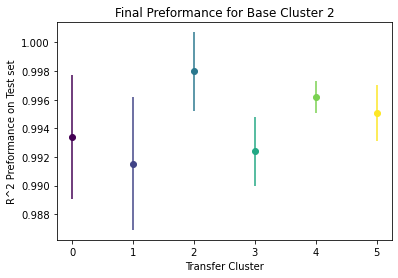

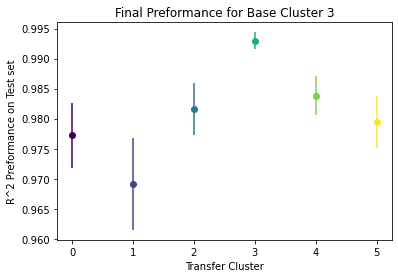

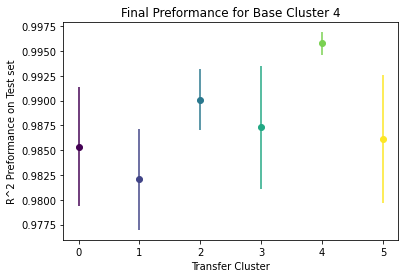

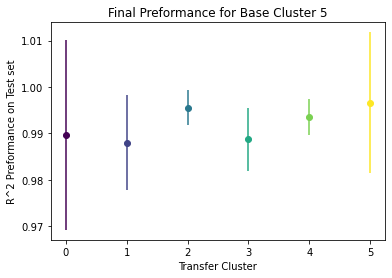

index -1 is out of bounds for axis 0 with size 0
error (0, 0)
integral,std_int,+1_std,normal
1.3242530604854474 0.5323133521833097 16.12121212121212 16.12121212121212
index -1 is out of bounds for axis 0 with size 0
error (0, 2)
integral,std_int,+1_std,normal
0.9731248867665979 0.6724329182956518 21.161616161616163 16.12121212121212
integral,std_int,+1_std,normal
0.0 0.4612042717701774 11.080808080808081 6.040404040404041
index -1 is out of bounds for axis 0 with size 0
error (0, 5)


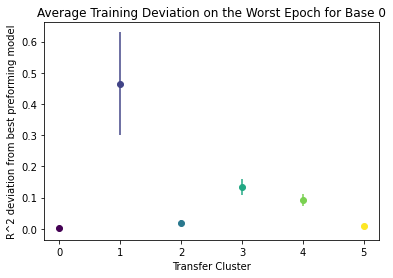

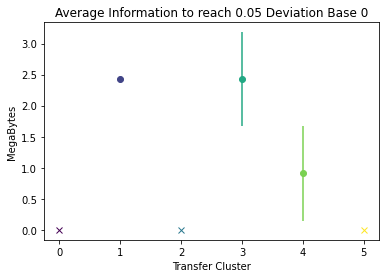

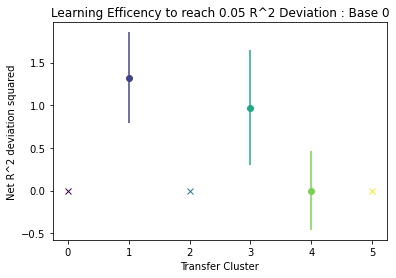

integral,std_int,+1_std,normal
0.0 0.5851250576331335 11.080808080808081 6.040404040404041
index -1 is out of bounds for axis 0 with size 0
error (1, 1)
integral,std_int,+1_std,normal
0.8480678431642087 0.6268584243577507 21.161616161616163 16.12121212121212
integral,std_int,+1_std,normal
3.8896289291105868 1.5761267417223994 41.323232323232325 36.282828282828284
integral,std_int,+1_std,normal
2.956375836188619 1.6675309799207216 36.282828282828284 26.202020202020204
integral,std_int,+1_std,normal
0.4609378195460717 0.135295860538315 11.080808080808081 11.080808080808081


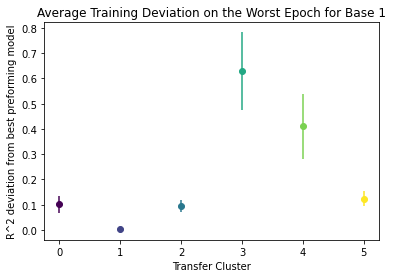

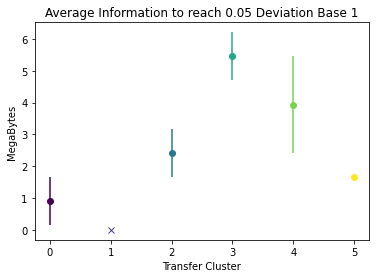

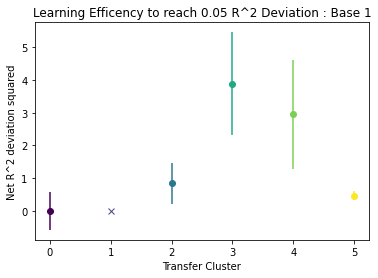

integral,std_int,+1_std,normal
0.0 0.5981698387949325 11.080808080808081 6.040404040404041
integral,std_int,+1_std,normal
6.701816977061153 4.809850694992708 66.52525252525253 46.36363636363637
index -1 is out of bounds for axis 0 with size 0
error (2, 2)
integral,std_int,+1_std,normal
0.37347283015086624 0.11111571968598577 11.080808080808081 11.080808080808081
index -1 is out of bounds for axis 0 with size 0
error (2, 4)
index -1 is out of bounds for axis 0 with size 0
error (2, 5)


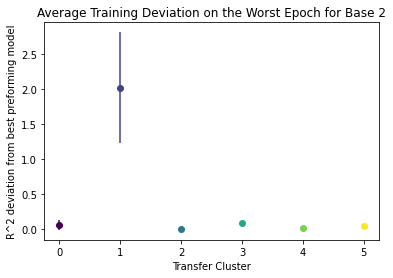

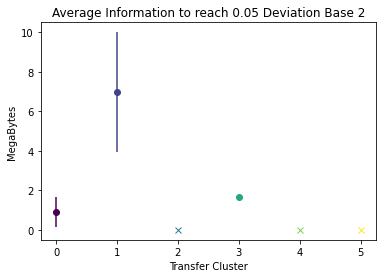

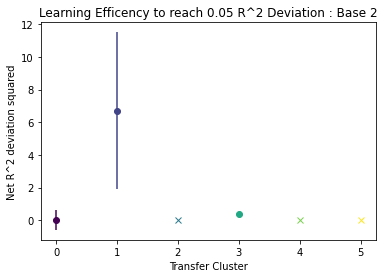

integral,std_int,+1_std,normal
40.70548899704355 362.54183096533797 86.68686868686869 66.52525252525253
integral,std_int,+1_std,normal
156.50695335237378 1325.8481515015803 142.13131313131314 106.84848484848486
integral,std_int,+1_std,normal
2.9664740071375792 2.187992036398999 21.161616161616163 16.12121212121212
index -1 is out of bounds for axis 0 with size 0
error (3, 3)
integral,std_int,+1_std,normal
0.4090595880384137 0.15900979796425263 11.080808080808081 11.080808080808081
integral,std_int,+1_std,normal
45.04536130601209 111.01119359670216 81.64646464646465 61.484848484848484


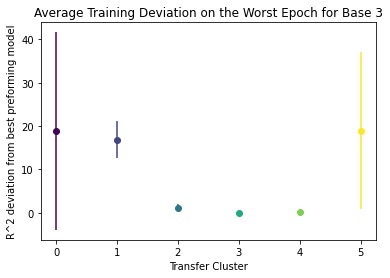

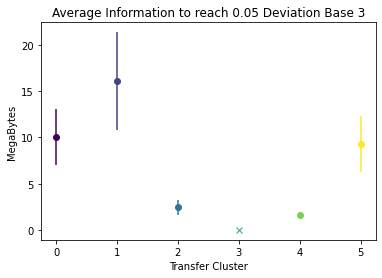

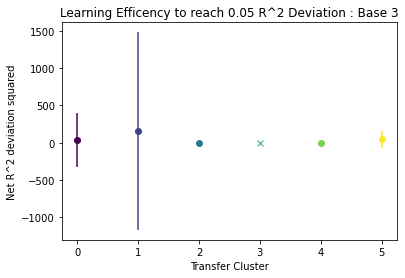

integral,std_int,+1_std,normal
4.87984472035781 5.058298750413228 36.282828282828284 21.161616161616163
integral,std_int,+1_std,normal
20.771947985052627 16.37051090921772 101.80808080808082 76.60606060606061
index -1 is out of bounds for axis 0 with size 0
error (4, 2)
integral,std_int,+1_std,normal
0.0 0.5151952426838565 11.080808080808081 6.040404040404041
index -1 is out of bounds for axis 0 with size 0
error (4, 4)
integral,std_int,+1_std,normal
2.9429727951357223 7.016774875820094 51.40404040404041 21.161616161616163


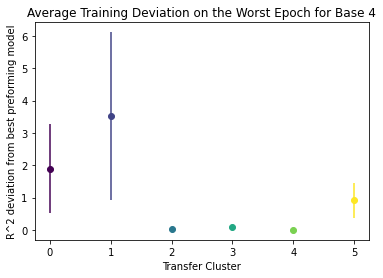

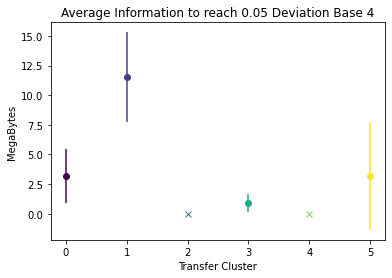

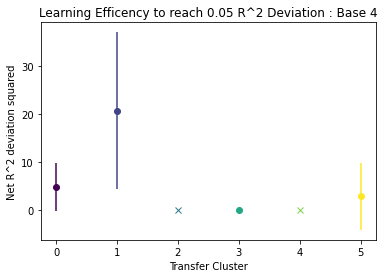

index -1 is out of bounds for axis 0 with size 0
error (5, 0)
integral,std_int,+1_std,normal
1.8037373763853262 1.5864082613507684 26.202020202020204 16.12121212121212
index -1 is out of bounds for axis 0 with size 0
error (5, 2)
integral,std_int,+1_std,normal
1.6645421630481811 0.9348834480321284 26.202020202020204 21.161616161616163
integral,std_int,+1_std,normal
0.5318166903380583 0.15754895281452963 11.080808080808081 11.080808080808081
index -1 is out of bounds for axis 0 with size 0
error (5, 5)


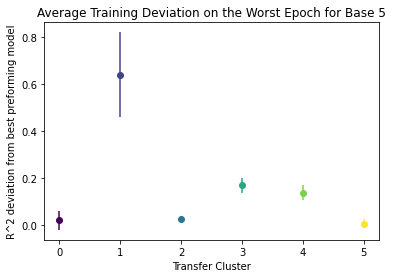

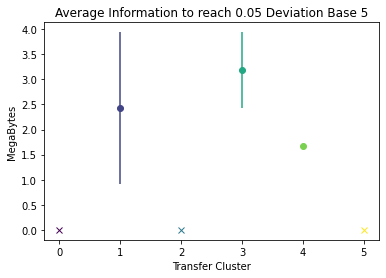

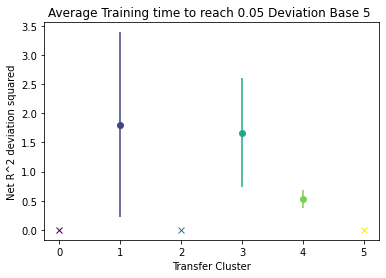

,Pc1,Pc2
topology_1,,
Cluster 0,1.120022,0.183213
Cluster 1,2.260897,0.658338
Cluster 2,-0.218161,-0.509055
Cluster 3,-2.844212,-0.155112
Cluster 4,-1.312880,-0.455051
Cluster 5,0.491338,-0.486521


c:\Users\Greg\Desktop\version_1\trade1-repo\TL_MOF\Functions\engine.py:278: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


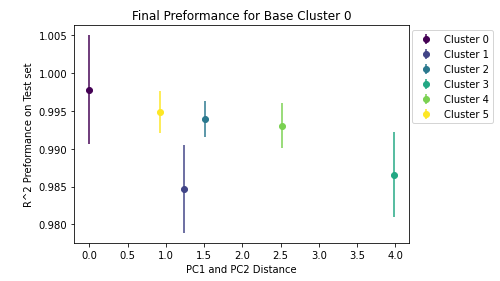

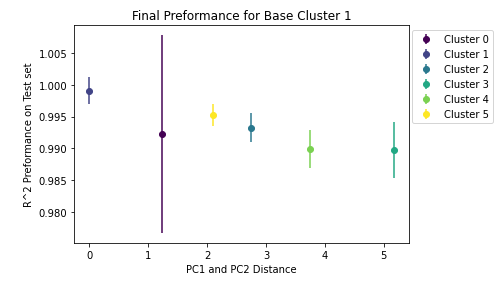

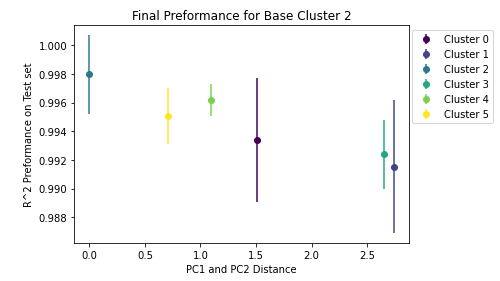

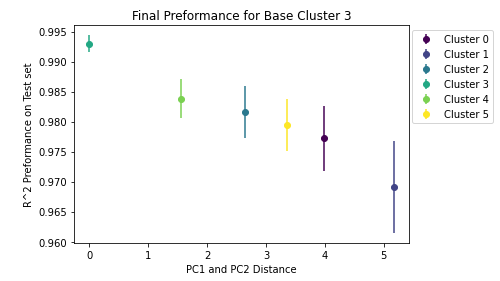

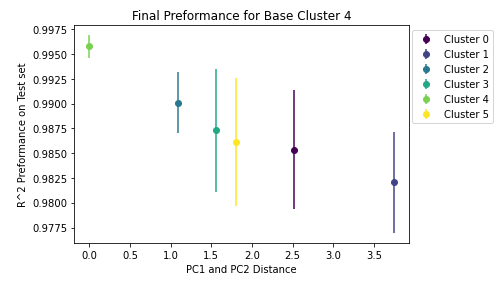

c:\Users\Greg\Desktop\version_1\trade1-repo\TL_MOF\Functions\engine.py:307: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


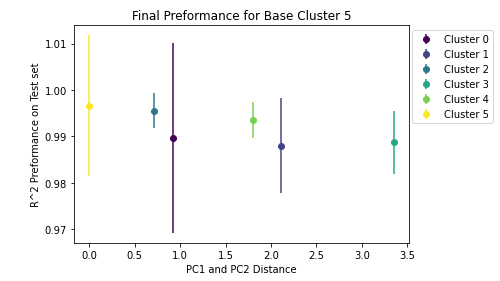

,Pc1
topology_1,
Cluster 0,1.120022
Cluster 1,2.260897
Cluster 2,-0.218161
Cluster 3,-2.844212
Cluster 4,-1.312880
Cluster 5,0.491338


c:\Users\Greg\Desktop\version_1\trade1-repo\TL_MOF\Functions\engine.py:278: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


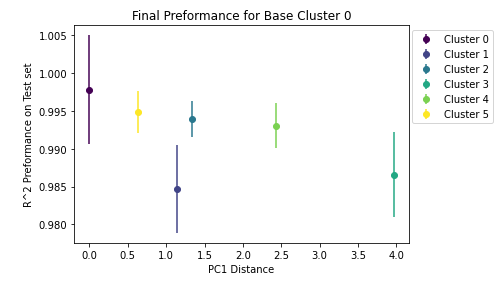

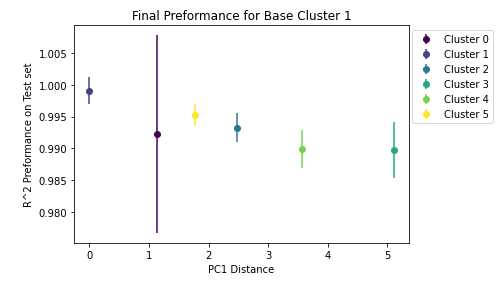

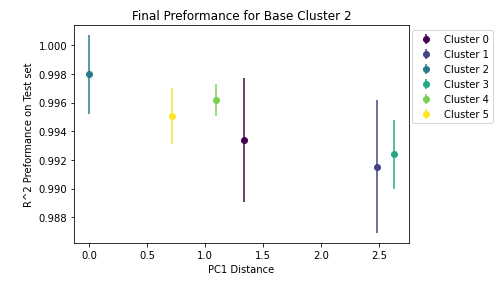

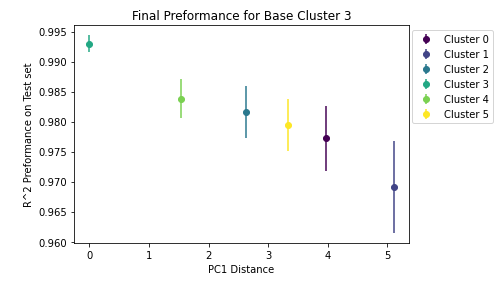

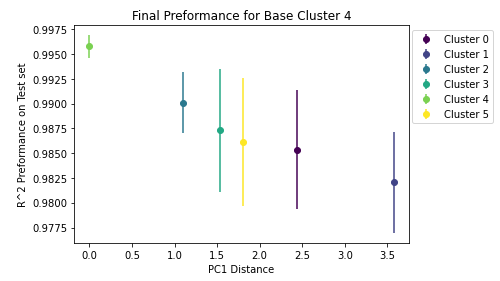

c:\Users\Greg\Desktop\version_1\trade1-repo\TL_MOF\Functions\engine.py:307: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


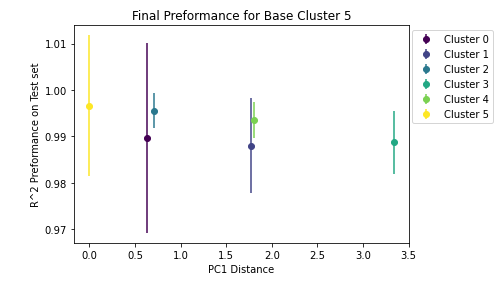

,Pc2
topology_1,
Cluster 0,0.183213
Cluster 1,0.658338
Cluster 2,-0.509055
Cluster 3,-0.155112
Cluster 4,-0.455051
Cluster 5,-0.486521


c:\Users\Greg\Desktop\version_1\trade1-repo\TL_MOF\Functions\engine.py:278: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


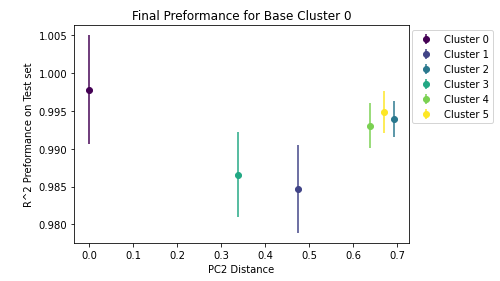

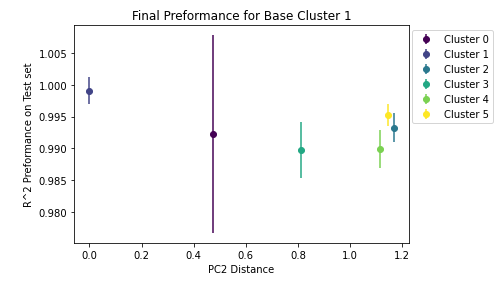

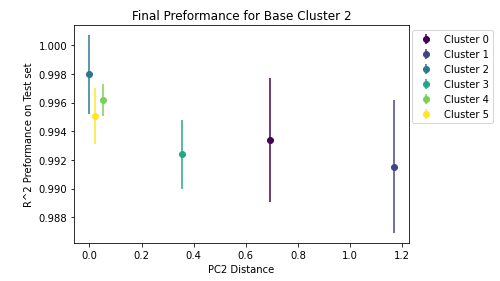

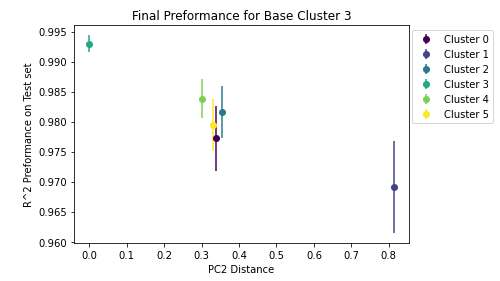

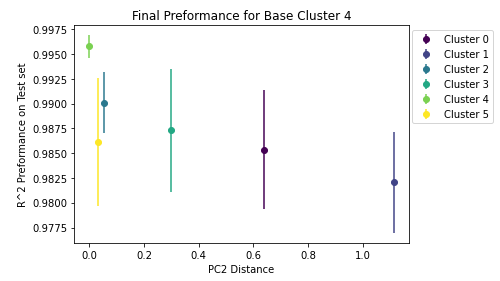

c:\Users\Greg\Desktop\version_1\trade1-repo\TL_MOF\Functions\engine.py:307: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


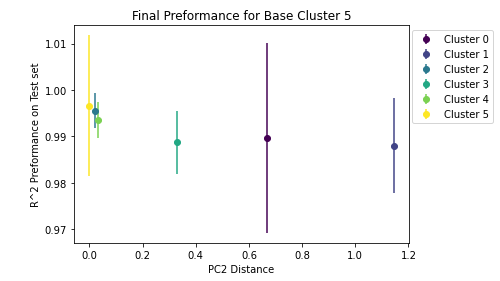

In [35]:
Cluster_colors=[
[0.267004, 0.004874, 0.329415, 1.      ],
[0.253935, 0.265254, 0.529983, 1.      ],
[0.163625, 0.471133, 0.558148, 1.      ],
[0.134692, 0.658636, 0.517649, 1.      ],
[0.477504, 0.821444, 0.318195, 1.      ],
[0.993248, 0.906157, 0.143936, 1.      ],]
dic,dic2,std=create_dictionaries(g_comp)
dic=unpack_dic(dic,meta)
std=create_std_matrix(dic,std)
dic2=preformance_graph_and_prep_2nd_set(Cluster_colors,dic,dic2,adjust=100,save=True)
Transfer_graphs(dic2,resolution,epoch_conversions,Cluster_colors,byte,std,epochs,save=True)
import pandas as pd
from scipy.spatial import distance_matrix
hold=pd.DataFrame()
hold[['Pc1', 'Pc2',"topology_1"]]=abridge[['Pc1', 'Pc2',"topology_1"]]
display(hold.groupby("topology_1").median())
distances=distance_matrix(hold.groupby("topology_1").median(),hold.groupby("topology_1").median())
make_distance_graph(dic,distances,Cluster_colors,"PC1 and PC2",save=True)
hold=pd.DataFrame()
hold[['Pc1',"topology_1"]]=abridge[['Pc1',"topology_1"]]
display(hold.groupby("topology_1").median())
distances=distance_matrix(hold.groupby("topology_1").median(),hold.groupby("topology_1").median())
make_distance_graph(dic,distances,Cluster_colors,"PC1",save=True)
hold=pd.DataFrame()
hold[['Pc2',"topology_1"]]=abridge[['Pc2',"topology_1"]]
display(hold.groupby("topology_1").median())
distances=distance_matrix(hold.groupby("topology_1").median(),hold.groupby("topology_1").median())
make_distance_graph(dic,distances,Cluster_colors,"PC2",save=True)

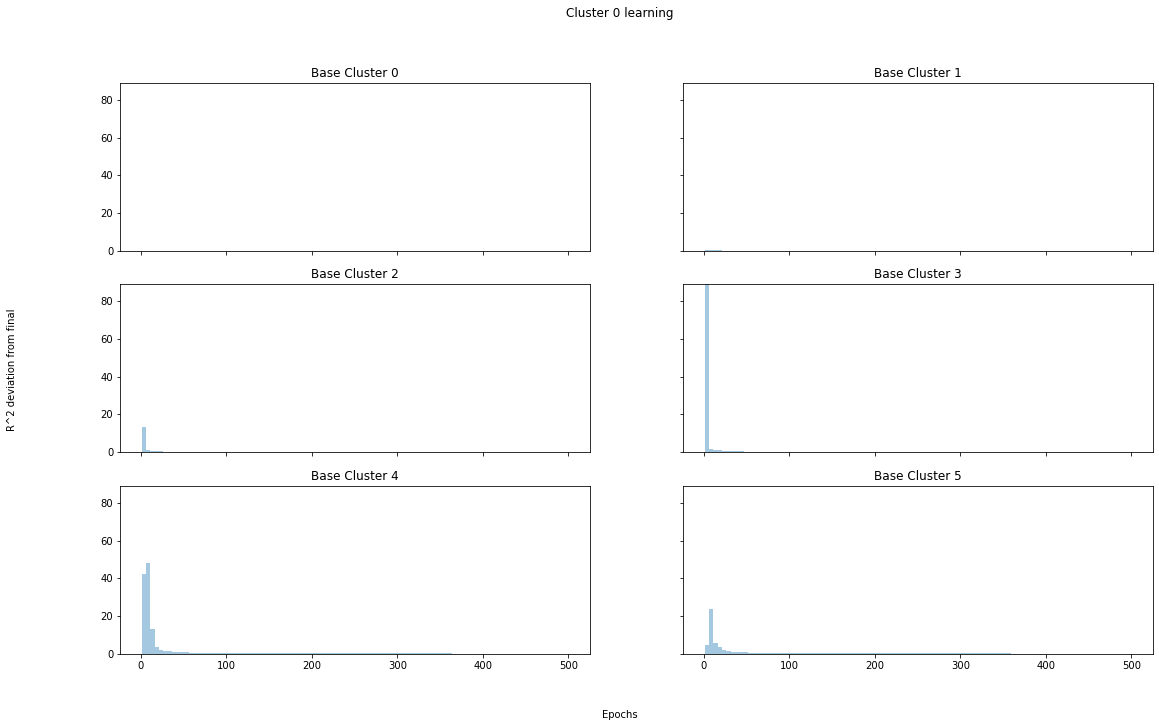

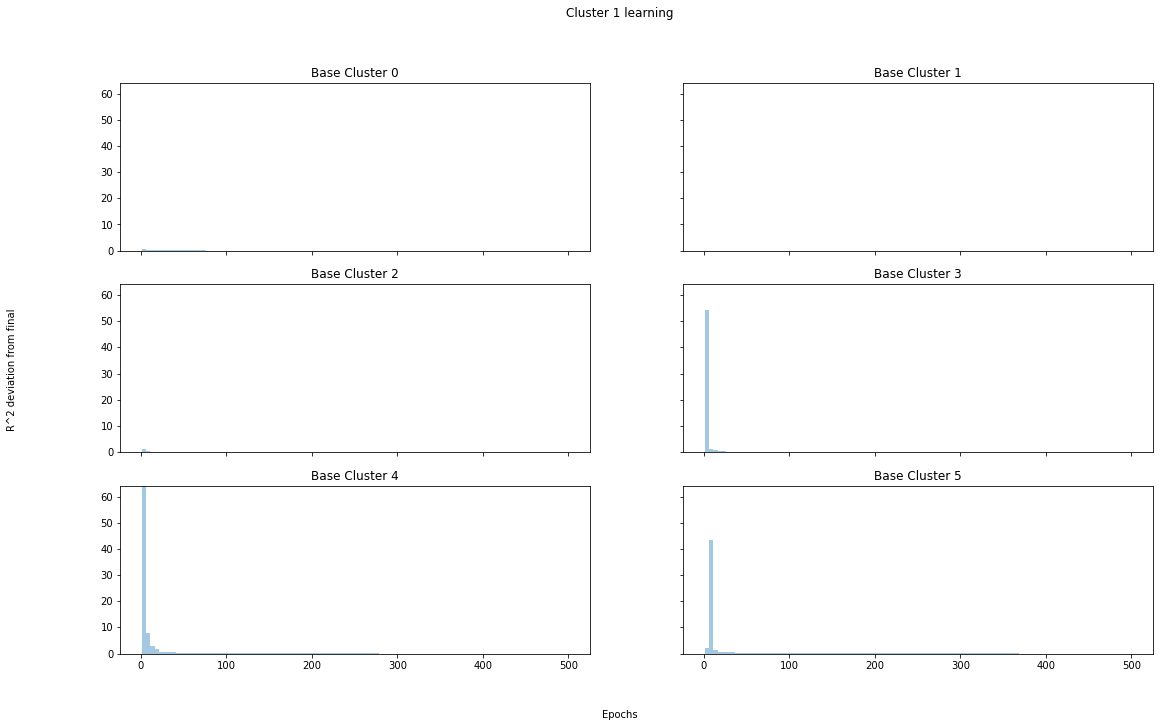

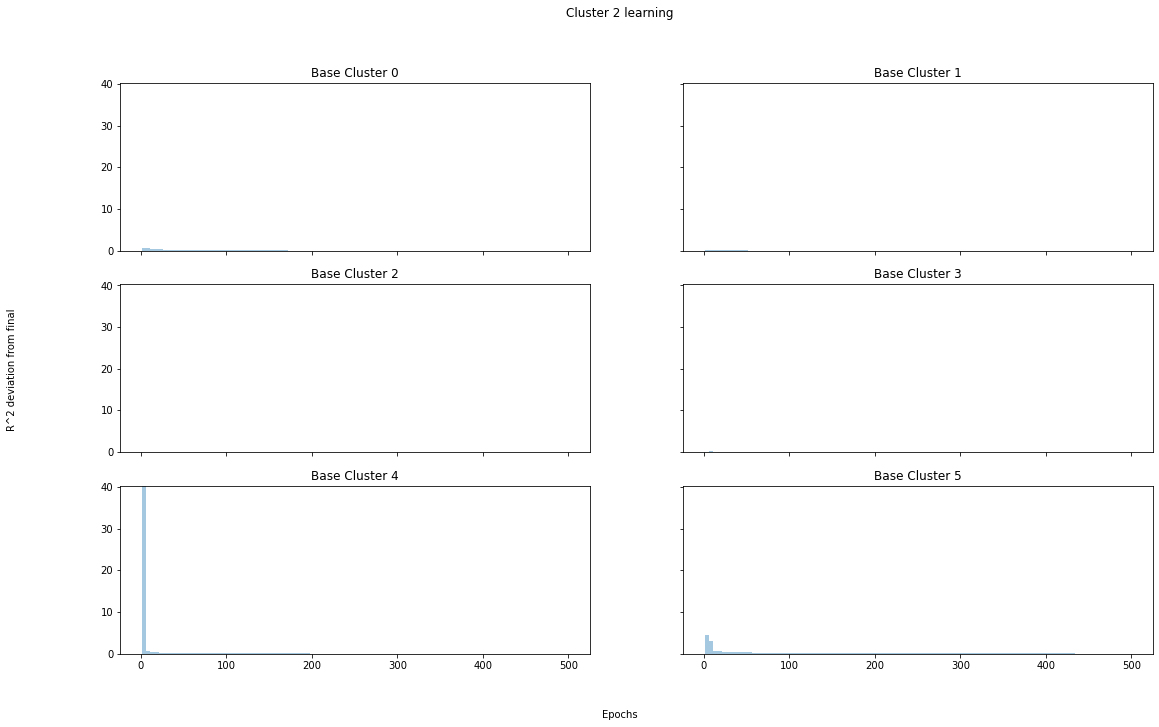

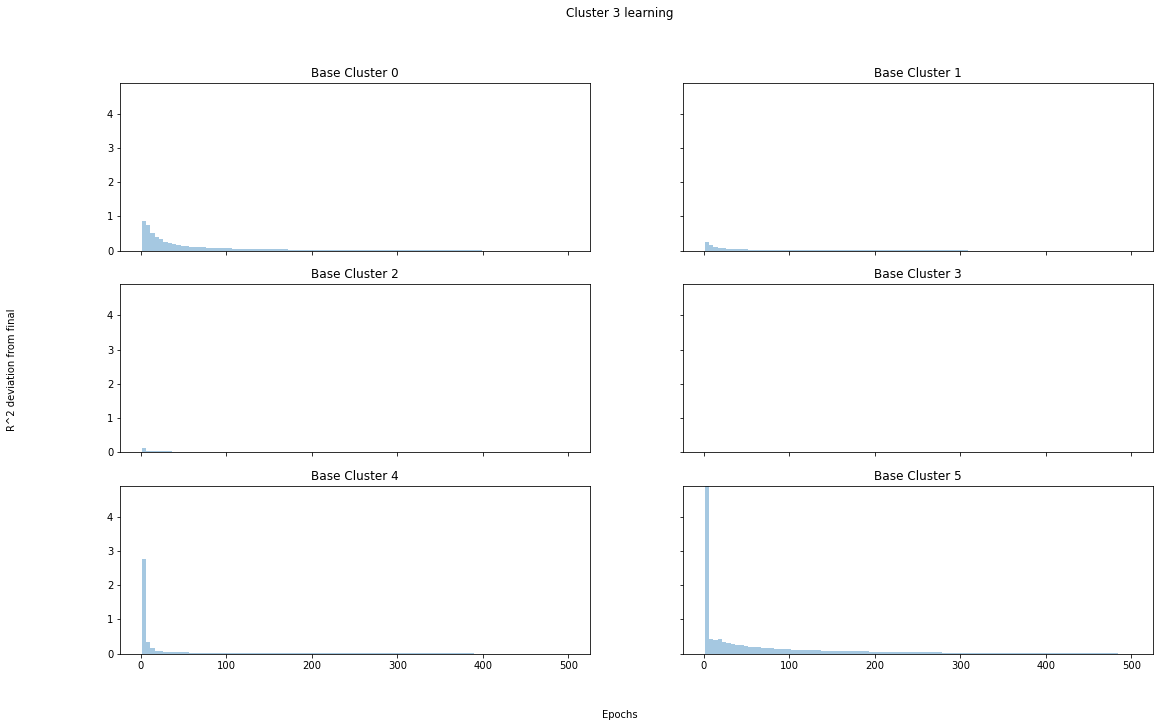

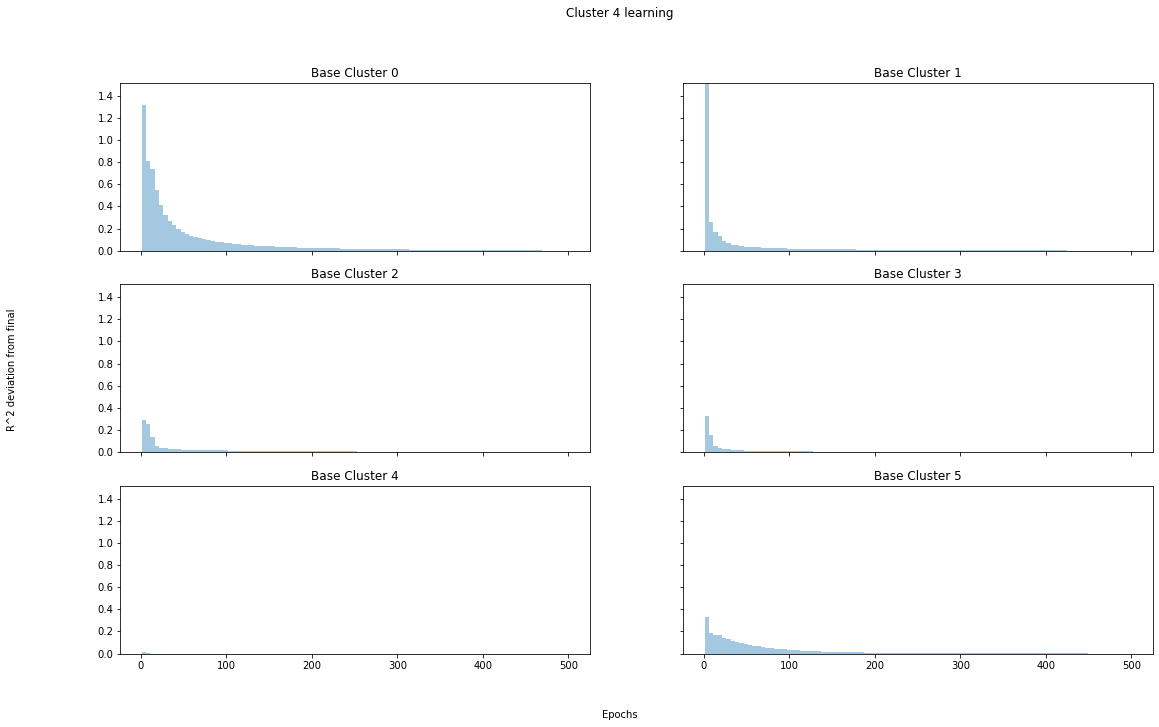

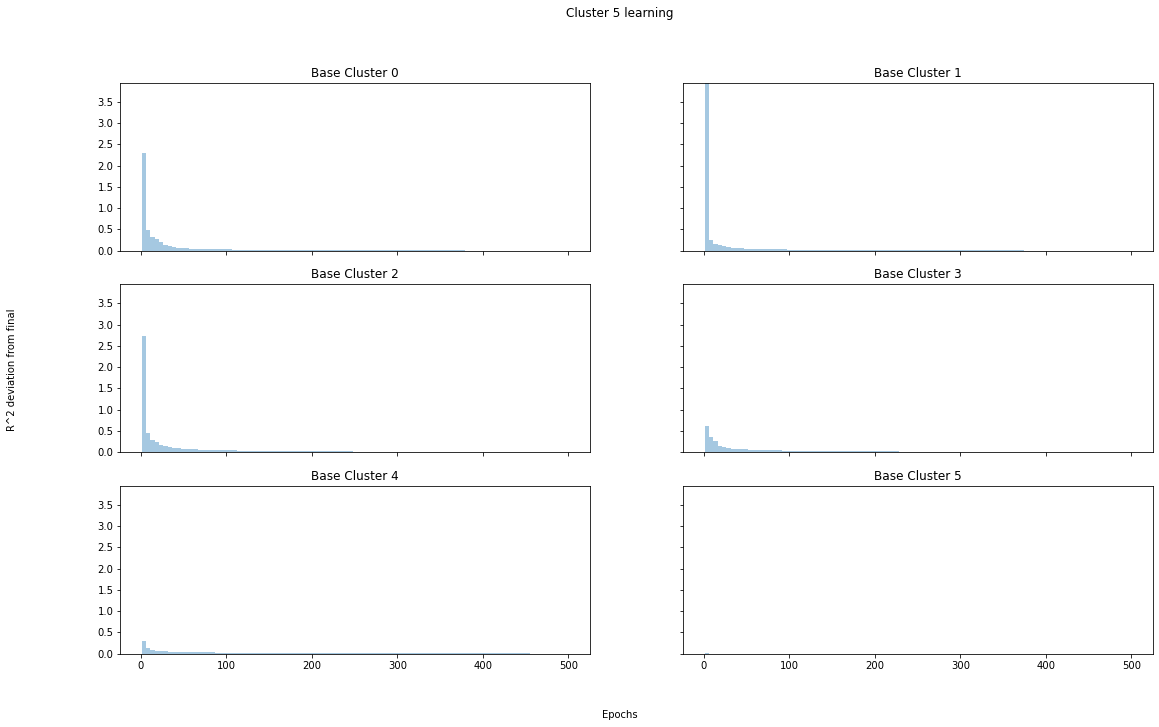

In [9]:
import numpy as np
base={}
std={}
for count,i in enumerate((meta[0])):
    i=meta[0][i]
    base[count]=(i)
for i in meta[1:]:
    for g in i:
        for count,z in enumerate(i[g]):
            base[int(g)][count]=np.array(base[int(g)][count])+np.array(z)
anaylsis(base,adjust=100)

In [10]:
#packages pngs
import os
folder=name[:-5]
os.mkdir(folder)
path=os.getcwd()
for i in os.listdir(path):
    if (i[-3:]) == "png":
        os.rename(f"{path}/{i}",f"{path}/{folder}/{i}")
    else: 
        pass